In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/navalplantmaintenance/navalplantmaintenance.csv


**Data Set Information:**

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel.
In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines.
The propulsion system behaviour has been described with this parameters:
- Ship speed (linear function of the lever position lp).
- Compressor degradation coefficient kMc.
- Turbine degradation coefficient kMt.
so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc).
The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation.
In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975].
Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots.
A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter's space.
Check the README.txt file for further details about this dataset.

- A 16-feature vector containing the GT measures at steady state of the physical asset:
Lever position (lp) [ ]
Ship speed (v) [knots]
Gas Turbine (GT) shaft torque (GTT) [kN m]
GT rate of revolutions (GTn) [rpm]
Gas Generator rate of revolutions (GGn) [rpm]
Starboard Propeller Torque (Ts) [kN]
Port Propeller Torque (Tp) [kN]
Hight Pressure (HP) Turbine exit temperature (T48) [C]
GT Compressor inlet air temperature (T1) [C]
GT Compressor outlet air temperature (T2) [C]
HP Turbine exit pressure (P48) [bar]
GT Compressor inlet air pressure (P1) [bar]
GT Compressor outlet air pressure (P2) [bar]
GT exhaust gas pressure (Pexh) [bar]
Turbine Injecton Control (TIC) [%]
Fuel flow (mf) [kg/s]
- GT Compressor decay state coefficient
- GT Turbine decay state coefficient





In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Import Data

In [3]:
data= pd.read_csv('/kaggle/input/navalplantmaintenance/navalplantmaintenance.csv',delim_whitespace=True, header=None)
print(data.shape)
data.head()

(11934, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
## Naming column and drop nan values, conduct complete data frame
data.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque',
                     'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure',
                     'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']
data = data.dropna()
data.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
data.describe()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


## Check missing values
**There is no missing value**

In [6]:
data.isna().sum()/len(data)

lever_position         0.0
ship_speed             0.0
gt_shaft               0.0
gt_rate                0.0
gg_rate                0.0
sp_torque              0.0
pp_torque              0.0
hpt_temp               0.0
gt_c_i_temp            0.0
gt_c_o_temp            0.0
hpt_pressure           0.0
gt_c_i_pressure        0.0
gt_c_o_pressure        0.0
gt_exhaust_pressure    0.0
turbine_inj_control    0.0
fuel_flow              0.0
gt_c_decay             0.0
gt_t_decay             0.0
dtype: float64

In [7]:
## Correlation matrix
np.round(data.corr(),4)

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
lever_position,1.0000,0.9999,0.9610,0.9621,0.9860,0.9592,0.9592,0.9612,NaN,0.9827,0.9631,NaN,0.9691,0.9534,0.9136,0.9314,0.0000,0.0000
ship_speed,0.9999,1.0000,0.9582,0.9604,0.9866,0.9564,0.9564,0.9588,NaN,0.9812,0.9606,NaN,0.9670,0.9508,0.9100,0.9278,0.0000,0.0000
gt_shaft,0.9610,0.9582,1.0000,0.9897,0.9330,0.9992,0.9992,0.9911,NaN,0.9902,0.9989,NaN,0.9976,0.9960,0.9779,0.9951,0.0030,0.0004
gt_rate,0.9621,0.9604,0.9897,1.0000,0.9430,0.9886,0.9886,0.9796,NaN,0.9893,0.9951,NaN,0.9960,0.9940,0.9623,0.9802,0.0014,-0.0000
gg_rate,0.9860,0.9866,0.9330,0.9430,1.0000,0.9296,0.9296,0.9398,NaN,0.9667,0.9375,NaN,0.9459,0.9242,0.8791,0.8970,-0.0188,0.0100
sp_torque,0.9592,0.9564,0.9992,0.9886,0.9296,1.0000,1.0000,0.9860,NaN,0.9874,0.9980,NaN,0.9962,0.9962,0.9775,0.9944,0.0008,0.0001
pp_torque,0.9592,0.9564,0.9992,0.9886,0.9296,1.0000,1.0000,0.9860,NaN,0.9874,0.9980,NaN,0.9962,0.9962,0.9775,0.9944,0.0008,0.0001
hpt_temp,0.9612,0.9588,0.9911,0.9796,0.9398,0.9860,0.9860,1.0000,NaN,0.9923,0.9894,NaN,0.9905,0.9801,0.9697,0.9863,-0.0396,-0.0385
gt_c_i_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gt_c_o_temp,0.9827,0.9812,0.9902,0.9893,0.9667,0.9874,0.9874,0.9923,NaN,1.0000,0.9917,NaN,0.9944,0.9835,0.9587,0.9765,-0.0472,-0.0169


**Drop column**
The attributes gt_c_i_temp and gt_c_i_pressure have no correlations, we can notice that that standard dev of the gt_c_i_temp in the data describe is 0, showing that this is a constant, not a variable because it does not change over time

In [8]:
data=data.drop('gt_c_i_temp', axis=1)
data=data.drop('gt_c_i_pressure',axis=1)
data.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_o_temp,hpt_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


## The target values is the coefficient of compressor (kMc) and turbine (kMc) over the decay state

**Let Y1 is kMc and Y2 is kMt**

In [9]:
X=data[['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque',
        'pp_torque', 'hpt_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_o_pressure','gt_exhaust_pressure',
        'turbine_inj_control', 'fuel_flow']]
Y1=data['gt_c_decay']
Y2=data['gt_t_decay']
Y=pd.DataFrame([Y1,Y2]).transpose()
print(Y.shape)
Y.head()

(11934, 2)


,gt_c_decay,gt_t_decay
0,0.95,0.975
1,0.95,0.975
2,0.95,0.975
3,0.95,0.975
4,0.95,0.975


In [10]:
print(X.shape)
X.head()


(11934, 14)


,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_o_temp,hpt_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522


Text(0.5, 1.0, 'kMt over time')

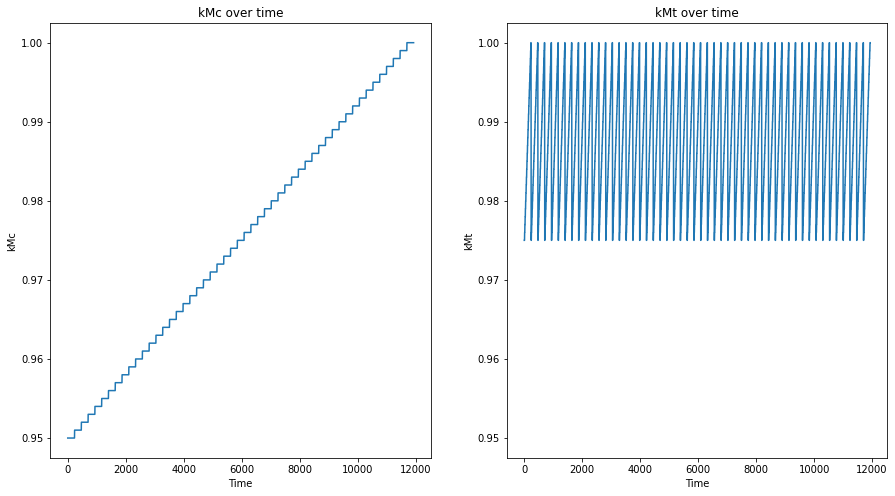

In [11]:
plt.figure(figsize =(15,8))

ax1 = plt.subplot(1,2,1)
sns.lineplot(data=Y, x=Y.index, y='gt_c_decay')
ax1.set_xlabel('Time')
ax1.set_ylabel('kMc')
ax1.set_title('kMc over time')

ax2 = plt.subplot(1,2,2,sharey=ax1)
sns.lineplot(data=Y, x=Y.index, y='gt_t_decay')
ax2.set_xlabel('Time')
ax2.set_ylabel('kMt')
ax2.set_title('kMt over time')

**Notice**
The coeeficient of Compressor(kMc) in increase over time from 0.95 to 1 and the coefficient of Turbine fluctuated in the range 0.975 to 1

Text(0.5, 1.0, 'Correlation of features')

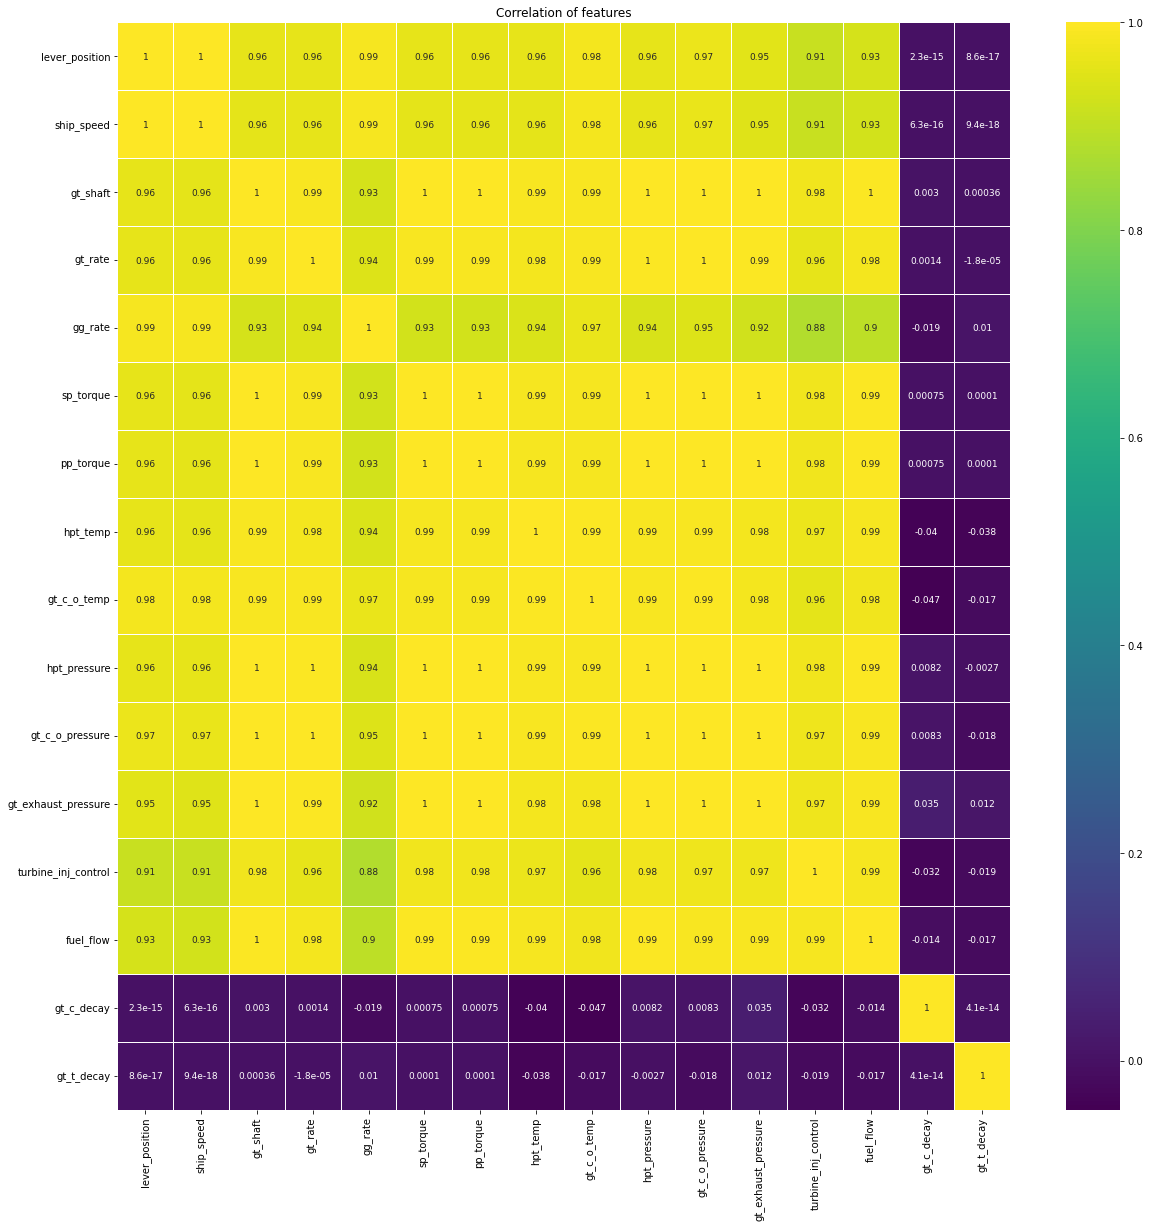

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap = 'viridis', linewidth =1, annot=True, annot_kws = {'size':9})
plt.title('Correlation of features')

**Notice** Even there are strong linear correlation between variables but the correlation score between variables and Kmc, Kmt are very low, to select attributes for fitting model, I used PCA

## Splitting data for Training and Testing
since

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y)
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X,Y1)
X_train_t,X_test_t,y_train_t,y_test_t=train_test_split(X,Y2)
print(X_train.shape)
print(y_train.shape)
X_train.head()

(8950, 14)
(8950, 2)


,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_o_temp,hpt_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow
4645,2.088,6.0,3623.411,1384.496,6846.524,29.628,29.628,511.962,561.372,1.229,6.552,1.020,0.000,0.141
2379,4.161,12.0,14723.207,1547.462,7777.502,113.776,113.776,653.174,610.977,1.659,8.980,1.022,17.752,0.351
10263,4.161,12.0,14719.156,1547.455,7739.039,113.752,113.752,622.763,601.030,1.662,8.850,1.023,16.399,0.325
11199,4.161,12.0,14718.578,1547.452,7730.304,113.724,113.724,621.031,600.196,1.663,8.854,1.023,16.328,0.323
9885,4.161,12.0,14717.925,1547.445,7710.050,113.738,113.738,636.888,603.769,1.665,8.992,1.023,17.087,0.338


## Normalized data

In [14]:
from sklearn.preprocessing import StandardScaler
X_train_s = StandardScaler().fit_transform(X_train.values)
X_train_s  = pd.DataFrame(X_train_s, index = X_train.index,columns = X_train.columns )
X_test_s = StandardScaler().fit_transform(X_test.values)
X_test_s  = pd.DataFrame(X_test_s, index = X_test.index,columns = X_test.columns )

## Model Selection

In [15]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

## Compressor (kMc)

In [16]:
models = [('LinearRegression', LinearRegression()),
          ('RandomForestRegressor', RandomForestRegressor()),
          ('KNeighborsRegressor', KNeighborsRegressor()),
          ('DecisionTreeRegressor',DecisionTreeRegressor()),
          ('BaggingRegressor' , BaggingRegressor()),
          ('XGBRegressor', XGBRegressor())]


for name , model in models:
    model.fit(X_train_c, y_train_c)
    r2_score =model.score(X_test_c, y_test_c)
    print("Score of model: " + str(name)+ 'is: '+ str(r2_score))
 

Score of model: LinearRegressionis: 0.8424026802936662
Score of model: RandomForestRegressoris: 0.995101544242519
Score of model: KNeighborsRegressoris: 0.9393908897578276
Score of model: DecisionTreeRegressoris: 0.9818805005053559
Score of model: BaggingRegressoris: 0.9936636451556503
Score of model: XGBRegressoris: 0.9911652730041144


**XBGRegressor** is the best model for compressor

In [17]:
models = [('LinearRegression', LinearRegression()),
          ('RandomForestRegressor', RandomForestRegressor()),
          ('KNeighborsRegressor', KNeighborsRegressor()),
          ('DecisionTreeRegressor',DecisionTreeRegressor()),
          ('BaggingRegressor' , BaggingRegressor()),
          ('XGBRegressor', XGBRegressor())]


for name , model in models:
    model.fit(X_train_t, y_train_t)
    r2_score =model.score(X_test_t, y_test_t)
    print("Score of model: " + str(name)+ 'is: '+ str(r2_score))
 

Score of model: LinearRegressionis: 0.9086774836110324
Score of model: RandomForestRegressoris: 0.9921369820766756
Score of model: KNeighborsRegressoris: 0.8762497937837421
Score of model: DecisionTreeRegressoris: 0.9755889054598855
Score of model: BaggingRegressoris: 0.9896787382453378
Score of model: XGBRegressoris: 0.9846532390166214


**Bagging Regressor** is the best model for turbine

## Optimize model by reducing feature using PCA

<AxesSubplot:>

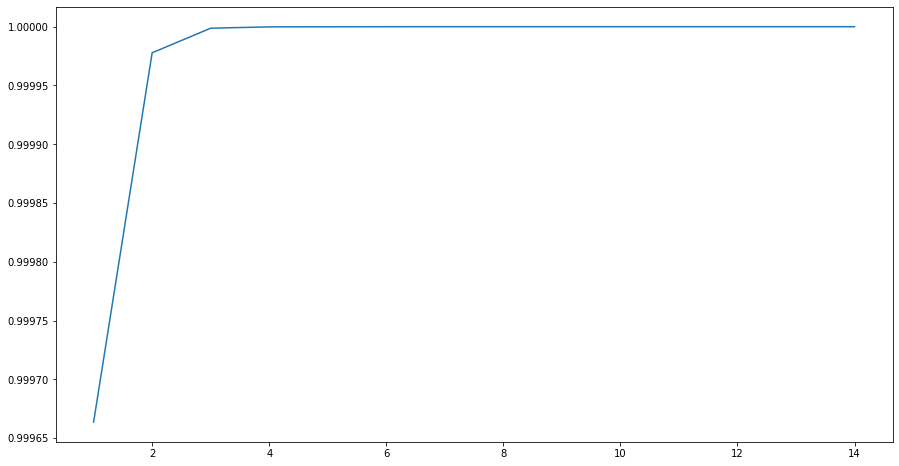

In [18]:
from sklearn.decomposition import PCA
select_components = PCA(random_state=72)
select_components.fit(X_train)
variation = np.cumsum(select_components.explained_variance_ratio_)
components = np.arange(1,15)
plt.figure(figsize =(15,8))
sns.lineplot(x=components, y=variation)

**Notice** Choosing the first 3 principal components since they are account for the most variations

In [19]:
## Choose 3 best principal components
pca_comp = PCA(n_components = 3, random_state =72)
# PCA on Compressor
XGB=XGBRegressor()
X_train_c_pca = pca_comp.fit_transform(X_train_c)
X_test_c_pca = pca_comp.fit_transform(X_test_c)
XGB.fit(X_train_c_pca, y_train_c)
score1 = XGB.score(X_test_c_pca, y_test_c)
print('R_square for PCA regression of Compressor: '+str(score1))
# PCA on Turbine
Bagg = BaggingRegressor()
X_train_t_pca = pca_comp.fit_transform(X_train_t)
X_test_t_pca = pca_comp.fit_transform(X_test_t)
Bagg.fit(X_train_t_pca, y_train_t)
score2 = Bagg.score(X_test_t_pca, y_test_t)
print('R_square for PCA regression of Compressor: '+str(score2))

R_square for PCA regression of Compressor: -0.3439777943386615
R_square for PCA regression of Compressor: -0.7405663765083084
